# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "citypy/worldcities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q=canillo&APPID=" + api_key
a_city = requests.get(base_url).json()
a_city

{'coord': {'lon': 1.6, 'lat': 42.57},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 274.25,
  'feels_like': 268.09,
  'temp_min': 271.48,
  'temp_max': 277.04,
  'pressure': 1026,
  'humidity': 14},
 'wind': {'speed': 3.52, 'deg': 26},
 'clouds': {'all': 30},
 'dt': 1577666997,
 'sys': {'type': 3,
  'id': 19636,
  'country': 'FR',
  'sunrise': 1577690589,
  'sunset': 1577723305},
 'timezone': 3600,
 'id': 3041204,
 'name': 'Canillo',
 'cod': 200}

In [22]:
base_url = "http://api.openweathermap.org/data/2.5/weather?APPID=" + api_key

city_data = []
for i, city in enumerate(cities):
    url = base_url + "&q=" + city
    print("Processing Record %s | %s" %(i,city))
    try:
        city_weather = requests.get(url).json()
        cloudiness=city_weather["clouds"]["all"]
        country=city_weather["sys"]["country"]
        date=city_weather["dt"]
        humidity=city_weather["main"]["humidity"]
        lat=city_weather["coord"]["lat"]
        lng=city_weather["coord"]["lon"]
        max_temp=city_weather["main"]["temp_max"]
        wind_speed=city_weather["wind"]["speed"]
        city_data.append({"City": city,
                         "Cloudiness": cloudiness,
                         "Country" : country,
                         "Date": date,
                         "Humidity": humidity,
                         "Lat": lat,
                         "Lng" : lng,
                         "Max Temp": max_temp,
                         "Wind Speed": wind_speed})
    except:
        print("City not found, skipping")
        pass

Processing Record 0 | butaritari
Processing Record 1 | fort nelson
Processing Record 2 | salalah
Processing Record 3 | dikson
Processing Record 4 | jamestown
Processing Record 5 | castro
Processing Record 6 | saskylakh
Processing Record 7 | galesong
Processing Record 8 | ngunguru
Processing Record 9 | ruteng
Processing Record 10 | longlac
City not found, skipping
Processing Record 11 | tsihombe
City not found, skipping
Processing Record 12 | honningsvag
Processing Record 13 | sinnamary
Processing Record 14 | bluff
Processing Record 15 | albany
Processing Record 16 | sao filipe
Processing Record 17 | rikitea
Processing Record 18 | khatanga
Processing Record 19 | pisco
Processing Record 20 | acapulco
Processing Record 21 | hasaki
Processing Record 22 | new norfolk
Processing Record 23 | bethel
Processing Record 24 | lebu
Processing Record 25 | barstow
Processing Record 26 | bogande
Processing Record 27 | ilulissat
Processing Record 28 | hilo
Processing Record 29 | altay
Processing Record

Processing Record 231 | mbacke
City not found, skipping
Processing Record 232 | georgetown
Processing Record 233 | la palma
Processing Record 234 | cotacachi
Processing Record 235 | aksarka
Processing Record 236 | bay roberts
Processing Record 237 | luderitz
Processing Record 238 | tortoli
Processing Record 239 | borba
Processing Record 240 | pevek
Processing Record 241 | shetpe
Processing Record 242 | lipin bor
Processing Record 243 | rudsar
Processing Record 244 | lakes entrance
Processing Record 245 | kentau
Processing Record 246 | san lazaro
Processing Record 247 | mae hong son
Processing Record 248 | songjianghe
Processing Record 249 | bogotol
Processing Record 250 | mega
Processing Record 251 | bronnoysund
Processing Record 252 | alice springs
Processing Record 253 | bassano del grappa
Processing Record 254 | souillac
Processing Record 255 | hambantota
Processing Record 256 | sorland
Processing Record 257 | husavik
Processing Record 258 | berdigestyakh
Processing Record 259 | mad

Processing Record 463 | zaoyang
Processing Record 464 | morondava
Processing Record 465 | forestville
Processing Record 466 | pangody
Processing Record 467 | talnakh
Processing Record 468 | yazd
Processing Record 469 | port blair
Processing Record 470 | vila
Processing Record 471 | te anau
Processing Record 472 | kingston
Processing Record 473 | trat
Processing Record 474 | ngukurr
City not found, skipping
Processing Record 475 | pauini
Processing Record 476 | ayan
Processing Record 477 | eyl
Processing Record 478 | rocha
Processing Record 479 | hobyo
Processing Record 480 | gao
Processing Record 481 | palmer
Processing Record 482 | tumannyy
City not found, skipping
Processing Record 483 | mentok
City not found, skipping
Processing Record 484 | tessaoua
Processing Record 485 | yeniseysk
Processing Record 486 | asha
Processing Record 487 | lubyany
Processing Record 488 | henties bay
Processing Record 489 | lishan
Processing Record 490 | ugoofaaru
Processing Record 491 | dolores
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
city_df = pd.DataFrame(city_data)
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,butaritari,97,KI,1577668184,75,3.07,172.79,301.94,5.61
1,fort nelson,90,CA,1577668184,76,58.81,-122.69,253.15,1.00
2,salalah,39,OM,1577668184,69,17.01,54.10,298.15,4.10
3,dikson,100,RU,1577668185,94,73.51,80.55,254.16,13.59
4,jamestown,42,AU,1577668176,18,-33.21,138.60,309.13,9.52


In [25]:
city_df.to_csv("City_Weather_Output.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
weather_df = pd.read_csv("City_Weather_Output.csv")
weather_df.head()

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,butaritari,97,KI,1577668184,75,3.07,172.79,301.94,5.61
1,1,fort nelson,90,CA,1577668184,76,58.81,-122.69,253.15,1.00
2,2,salalah,39,OM,1577668184,69,17.01,54.10,298.15,4.10
3,3,dikson,100,RU,1577668185,94,73.51,80.55,254.16,13.59
4,4,jamestown,42,AU,1577668176,18,-33.21,138.60,309.13,9.52


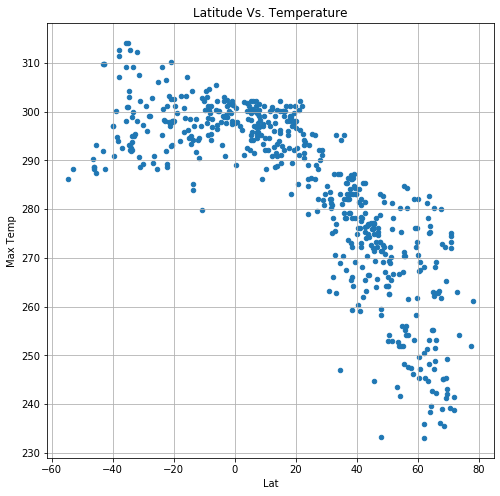

In [12]:
# Create a scatter plot which compares Latitude to Temp
weather_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8), 
                      title="Latitude Vs. Temperature")
plt.show()

#### Latitude vs. Humidity Plot

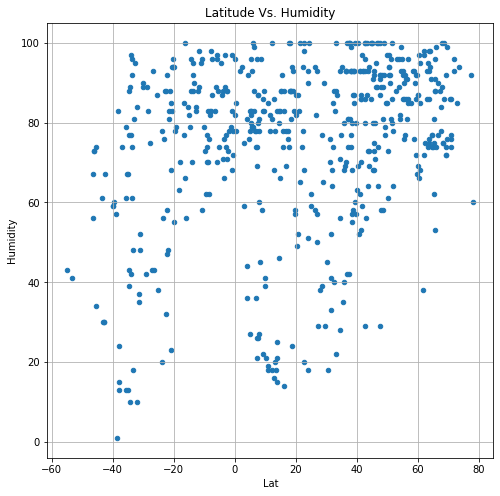

In [16]:
# Create a scatter plot which compares Latitude to Humidity
weather_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8), 
                      title="Latitude Vs. Humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

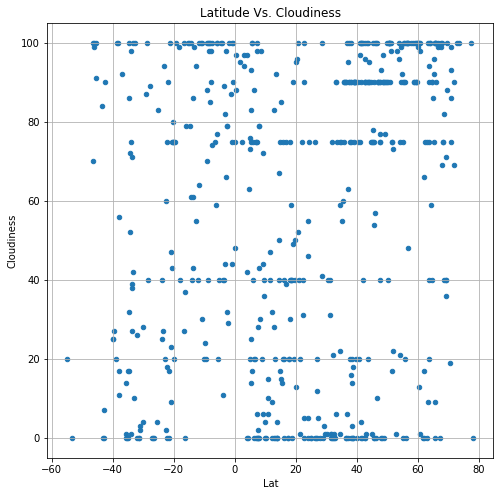

In [17]:
# Create a scatter plot which compares Latitude to Cloudiness
weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8), 
                      title="Latitude Vs. Cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

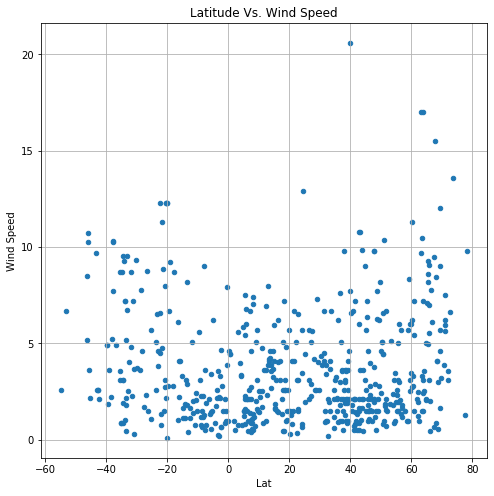

In [18]:
# Create a scatter plot which compares Latitude to Wind Speed
weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8), 
                      title="Latitude Vs. Wind Speed")
plt.show()